In [2]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_set = pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/train.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of macular edema
0,20051213_62188_0100_PP.tif,2,0
1,20051020_62615_0100_PP.tif,2,0
2,20051202_41238_0400_PP.tif,1,0
3,20060522_45455_0100_PP.tif,2,0
4,20060530_36895_0100_PP.tif,3,2


In [5]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Messidor/train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 960/960 [08:41<00:00,  1.84it/s]


(960, 224, 224, 3)


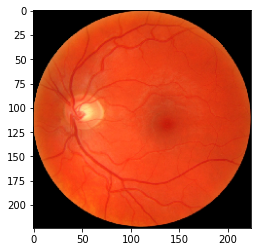

In [6]:
print(X.shape)
plt.imshow(X[2])

In [7]:
test_set =  pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/test.csv')    # reading the csv file
test_set.head() 

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [8]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [02:10<00:00,  1.84it/s]


In [9]:
Y.shape

(240, 224, 224, 3)

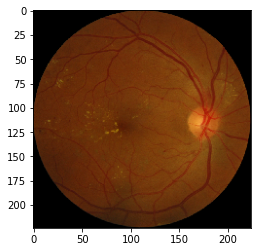

In [10]:
plt.imshow(Y[2])

In [11]:
y = np.array(train_set.drop(['Image', 'Id'],axis=1))
y.shape

(960, 1)

In [12]:
print(X.shape)
print(Y.shape)
print(y.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 224, 224, 3)
(96, 224, 224, 3)
(864, 1)
(96, 1)


In [22]:
densenet121_model = Sequential()

model= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in model.layers:
        layer.trainable=False

densenet121_model.add(model)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

NameError: ignored

In [23]:
densenet121_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
Total params: 7,037,504
Trainable params: 0
Non-trainable params: 7,037,504
_________________________________________________________________


In [24]:
densenet121_model.add(Flatten())
densenet121_model.add(Dense(512, activation='relu'))
densenet121_model.add(Dense(4, activation='softmax'))
densenet121_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 7,564,356
Trainable params: 526,852
Non-trainable params: 7,037,504
_________________________________________________________________


In [25]:
densenet121_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(densenet121_model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [26]:
history = densenet121_model.fit(X_train, y_train,
          batch_size=4,
          epochs=15,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/15
216/216 [==============================] - 126s 554ms/step - loss: 0.7073 - accuracy: 0.8079 - val_loss: 0.4908 - val_accuracy: 0.8438
Epoch 2/15
216/216 [==============================] - 116s 539ms/step - loss: 0.5195 - accuracy: 0.8495 - val_loss: 0.4948 - val_accuracy: 0.8542
Epoch 3/15
216/216 [==============================] - 116s 538ms/step - loss: 0.4555 - accuracy: 0.8530 - val_loss: 0.4467 - val_accuracy: 0.8646
Epoch 4/15
216/216 [==============================] - 116s 539ms/step - loss: 0.4243 - accuracy: 0.8681 - val_loss: 0.4494 - val_accuracy: 0.8646
Epoch 5/15
216/216 [==============================] - 117s 540ms/step - loss: 0.4338 - accuracy: 0.8576 - val_loss: 0.4129 - val_accuracy: 0.8646
Epoch 6/15
216/216 [==============================] - 117s 542ms/step - loss: 0.4050 - accuracy: 0.8750 - val_loss: 0.4056 - val_accuracy: 0.8646
Epoch 7/15
216/216 [==============================] - 120s 554ms/step - loss: 0.4251 - accuracy: 0.8692 - val_loss: 0.5762 -

In [28]:
score = densenet121_model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(densenet121_model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.44476208090782166
Test accuracy: 0.8541666865348816


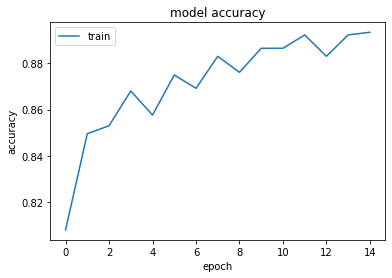

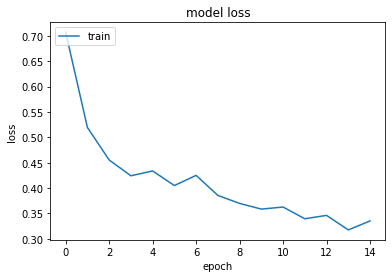

In [29]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()